In [1]:
import pandas as pd
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance, TimeSeriesResampler
import matplotlib.pyplot as plt
import numpy as np

/samoa/data/smrserraoseabr/anaconda3/envs/ge3/lib/python3.11/site-packages/tslearn/bases/bases.py:15: UserWarning: h5py not installed, hdf5 features will not be supported.
Install h5py to use hdf5 features: http://docs.h5py.org/
  warn(h5py_msg)


In [2]:
# Load data
file_path = "/samoa/data/smrserraoseabr/hackadelft/hackathon/dataset/consumption-1y-processed.csv"
data = pd.read_csv(file_path, index_col=0, sep=";")

In [4]:
data_reset = data.reset_index()

# Now melt the DataFrame with the correct id_vars
long_df = data_reset.melt(id_vars=['Id'], var_name='Time', value_name='Value')

# Sort by ID and Time to ensure the time series are aligned
long_df.sort_values(by=['Id', 'Time'], inplace=True)



In [5]:
# Group by 'Id' and collect the values into a list
grouped = long_df.groupby('Id')['Value'].apply(list)

# Convert lists to a uniform length (optional, based on need)
max_length = grouped.apply(len).max()
uniform_series = grouped.apply(lambda x: x + [np.nan] * (max_length - len(x)))

# Create a 3D numpy array suitable for tslearn
ts_data = to_time_series_dataset(list(uniform_series))

# Normalize the data
scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)  # Standardize to have mean 0 and std 1
ts_scaled = scaler.fit_transform(ts_data)

8738.501 --> 4779.744 --> 4608.013 --> 4539.287 --> 4500.115 --> 4491.379 --> 4470.444 --> 4458.817 --> 4445.835 --> 4433.460 --> 4429.226 --> 4423.982 --> 4415.192 --> 4411.302 --> 4409.231 --> 4408.462 --> 4407.702 --> 4407.702 --> 


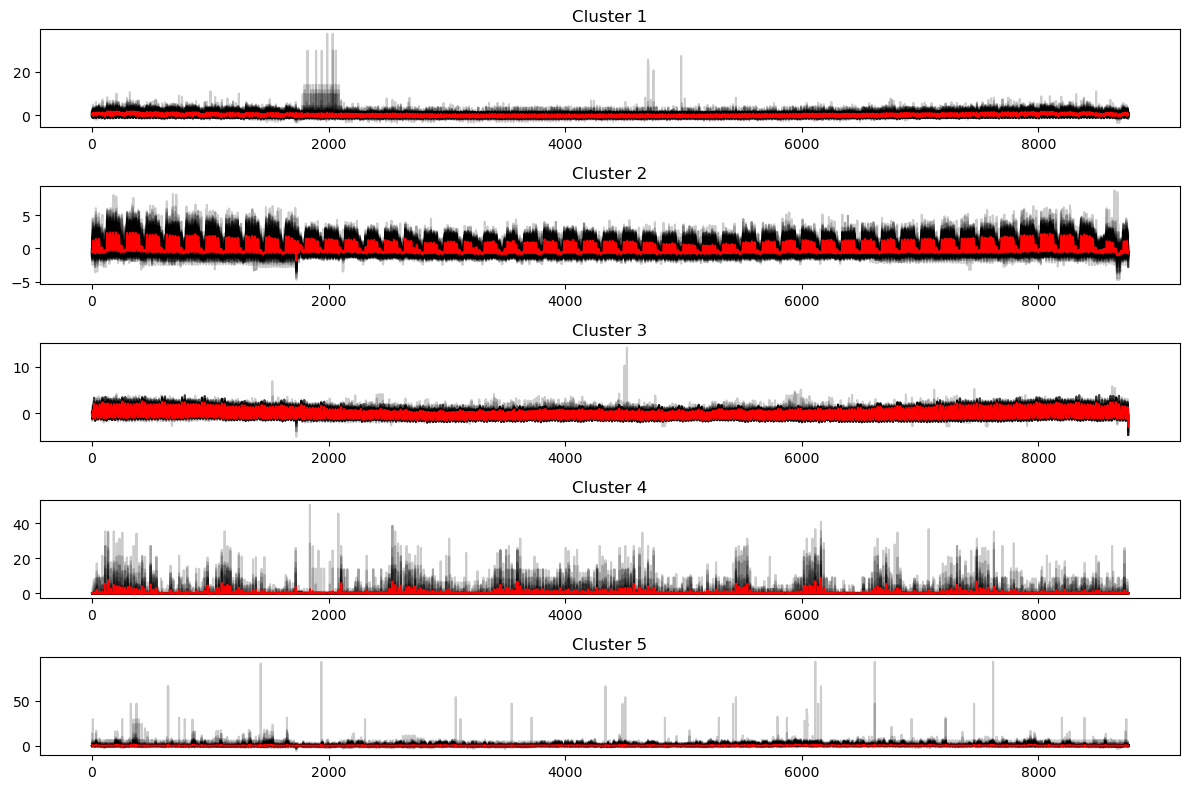

In [6]:
# Set the number of clusters
n_clusters = 5  # Adjust based on your specific requirements

# Initialize TimeSeriesKMeans with Euclidean distance
model_euclidean = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
y_pred_euclidean = model_euclidean.fit_predict(ts_scaled)

# Visualize the clustering (assuming ts_scaled is a 3D numpy array)
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
for yi in range(n_clusters):
    plt.subplot(n_clusters, 1, yi + 1)
    for xx in ts_scaled[y_pred_euclidean == yi]:
        plt.plot(xx.ravel(), "k-", alpha=0.2)
    plt.plot(model_euclidean.cluster_centers_[yi].ravel(), "r-")
    plt.title(f"Cluster {yi + 1}")
    #fix max and min for plot
    #plt.ylim(-10, 10)
plt.tight_layout()
plt.show()


In [7]:
from sklearn.metrics import silhouette_score

# Calculate Silhouette Score for Euclidean
score_euclidean = silhouette_score(ts_scaled.reshape(ts_scaled.shape[0], -1), y_pred_euclidean)
print(f"Silhouette Score (Euclidean): {score_euclidean}")



Silhouette Score (Euclidean): 0.19519710351634556


In [19]:
import pandas as pd
import numpy as np
from tslearn.utils import to_time_series_dataset
from tslearn.clustering import TimeSeriesKMeans
from tslearn.preprocessing import TimeSeriesScalerMeanVariance
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

def time_series_clustering(file_path, n_clusters=3):
    data = pd.read_csv(file_path, index_col=0, sep=";")

    # Preprocess the data
    data_reset = data.reset_index()
    long_df = data_reset.melt(id_vars=['Id'], var_name='Time', value_name='Value')
    long_df.sort_values(by=['Id', 'Time'], inplace=True)

    grouped = long_df.groupby('Id')['Value'].apply(list)
    max_length = grouped.apply(len).max()
    uniform_series = grouped.apply(lambda x: x + [np.nan] * (max_length - len(x)))

    # Create 3D numpy array suitable for tslearn
    ts_data = to_time_series_dataset(list(uniform_series))

    # Normalize the data
    scaler = TimeSeriesScalerMeanVariance(mu=0., std=1.)
    ts_scaled = scaler.fit_transform(ts_data)

    # Elbow Method
    inertia = []
    for k in range(1, 20):
        model = TimeSeriesKMeans(n_clusters=k, metric="euclidean", verbose=True)
        model.fit(ts_scaled)
        inertia.append(model.inertia_)

    # Plotting the elbow curve
    plt.figure(figsize=(8, 4))
    plt.plot(range(1, 20), inertia, marker='o')
    plt.title('Elbow Method')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.show()

    # Clustering with the optimal number of clusters (or specified)
    model_euclidean = TimeSeriesKMeans(n_clusters=n_clusters, metric="euclidean", verbose=True)
    y_pred_euclidean = model_euclidean.fit_predict(ts_scaled)

    # Visualization
    plt.figure(figsize=(12, 8))
    for yi in range(n_clusters):
        plt.subplot(n_clusters, 1, yi + 1)
        for xx in ts_scaled[y_pred_euclidean == yi]:
            plt.plot(xx.ravel(), "k-", alpha=0.2)
        plt.plot(model_euclidean.cluster_centers_[yi].ravel(), "r-")
        plt.title(f"Cluster {yi + 1}")
    plt.tight_layout()
    plt.show()

    # Calculate and print Silhouette Score
    score_euclidean = silhouette_score(ts_scaled.reshape(ts_scaled.shape[0], -1), y_pred_euclidean)
    print(f"Silhouette Score (Euclidean): {score_euclidean}")

    return y_pred_euclidean  # Or any other relevant output


13673.408 --> 6702.861 --> 6702.861 --> 
7524.137 --> 6435.956 --> 5741.008 --> 5463.164 --> 5398.404 --> 5393.081 --> 5392.812 --> 5392.812 --> 
6431.276 --> 5296.620 --> 5200.815 --> 5180.774 --> 5176.466 --> 5176.466 --> 
6319.080 --> 5195.841 --> 5121.090 --> 5079.866 --> 5058.179 --> 5050.357 --> 5042.525 --> 5034.529 --> 5030.547 --> 5029.353 --> 5028.154 --> 5027.745 --> 5027.745 --> 
6059.624 --> 4953.950 --> 4890.621 --> 4884.218 --> 4883.253 --> 4881.737 --> 4880.142 --> 4880.142 --> 
5813.668 --> 4569.345 --> 4485.812 --> 4458.336 --> 4444.781 --> 4438.693 --> 4435.501 --> 4433.978 --> 4430.943 --> 4428.444 --> 4404.929 --> 4365.459 --> 4352.628 --> 4349.821 --> 4348.534 --> 4348.534 --> 
5951.085 --> 4534.412 --> 4292.718 --> 4178.297 --> 4122.694 --> 4058.332 --> 4030.306 --> 4023.487 --> 4019.242 --> 4017.163 --> 4017.163 --> 
7754.066 --> 4235.251 --> 4025.806 --> 3984.748 --> 3975.897 --> 3968.170 --> 3959.487 --> 3955.073 --> 3952.643 --> 3949.636 --> 3948.176 --> 3946

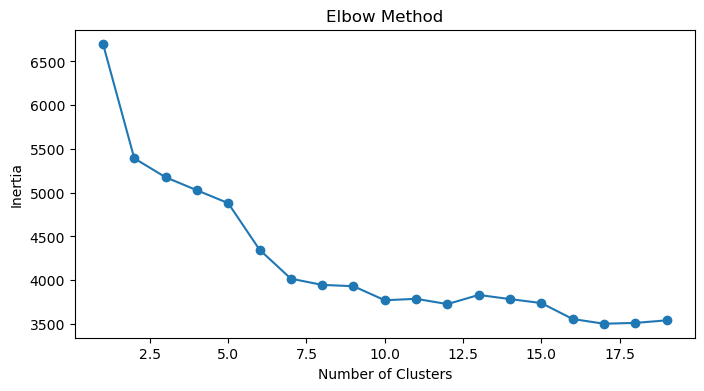

5359.532 --> 4325.793 --> 4186.851 --> 4085.812 --> 4053.937 --> 4033.068 --> 4027.985 --> 4024.658 --> 4024.658 --> 


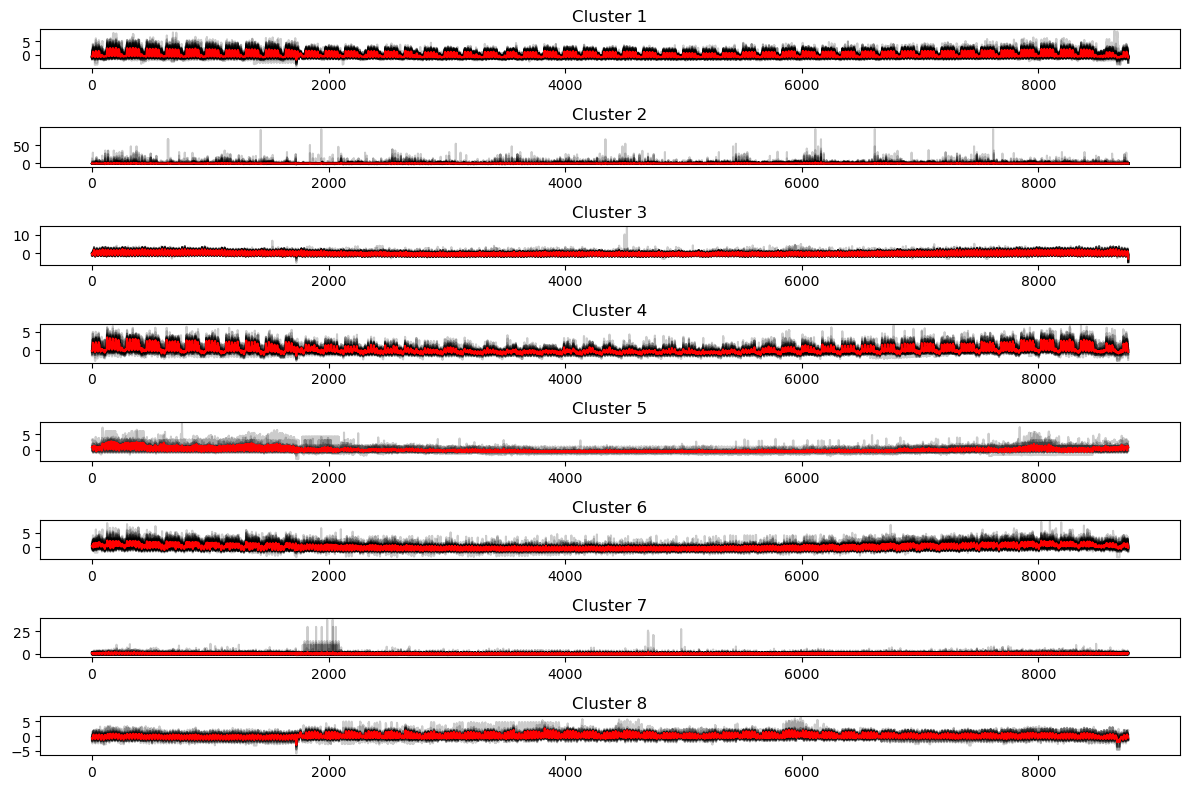

Silhouette Score (Euclidean): 0.17851596152350613


array([5, 0, 2, 2, 0, 0, 0, 0, 0, 6, 1, 4, 1, 5, 1, 1, 1, 2, 1, 3, 6, 0,
       3, 1, 0, 1, 0, 0, 1, 1, 3, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0,
       3, 5, 0, 0, 0, 0, 1, 1, 1, 3, 5, 1, 1, 1, 1, 5, 1, 0, 3, 1, 1, 3,
       0, 3, 5, 1, 2, 6, 5, 0, 0, 1, 5, 1, 1, 6, 1, 1, 3, 1, 1, 1, 0, 0,
       5, 0, 0, 4, 6, 0, 0, 0, 2, 1, 1, 6, 1, 1, 7, 0, 3, 5, 1, 1, 3, 5,
       0, 7, 0, 5, 1, 1, 6, 7, 1, 6, 1, 6, 1, 6, 4, 1, 1, 4, 6, 1, 1, 6,
       6, 1, 6, 6, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 7, 7, 1, 2, 1, 1,
       0, 6, 0, 1, 1, 7, 1, 1, 1, 0, 5, 0, 0, 2, 7, 0, 0, 0, 0, 5, 0, 0,
       0, 6, 6, 0, 0, 1, 2, 0, 2, 1, 7, 0, 0, 0, 0, 0, 3, 1, 7, 7, 4, 1,
       1, 1, 1, 1, 1, 4, 3, 0, 1, 3, 0, 2, 3, 3, 0, 1, 5, 6, 1, 7, 1, 1,
       5, 1, 5, 1, 1, 1, 4, 4, 1, 6, 1, 1, 1, 1, 6, 1, 1, 1, 6, 1, 1, 1,
       4, 6, 6, 1, 1, 1, 1, 1, 1, 1, 1, 6, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 5, 6, 0, 1, 1, 0, 3, 3, 6, 1, 3, 0, 1, 6, 7, 1, 1, 1, 6,
       1, 1, 1, 0, 1, 5, 6, 5, 1, 4, 1, 1, 2, 5, 3,

In [20]:
time_series_clustering('dataset/consumption-1y-processed.csv', 8)

